In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from matplotlib import rcParams

config = {
    "font.size": 13,
    'font.sans-serif': "Times New Roman"
}

rcParams.update(config)

In [42]:
def loadJSON(dir): 
    with open(dir, 'r', encoding='utf8') as fp:
        json_data = json.load(fp)
        return json_data

def loadData():
    listdir = ['ap_l', 'ap_m', 'ap_s', 'mAP']
    content = []
    for item in listdir:
        _list = os.listdir(item)
        json_data = []
        for file in _list:
            data = loadJSON('./' + item + '/' + file)
            json_data.append(data)
        content.append(json_data)
    return content

def formateData(data):
    result = []
    for item in data:
        content = []
        for _item in item:
            content.append(_item[2])
        result.append(content)
    return result

tableData = loadData()

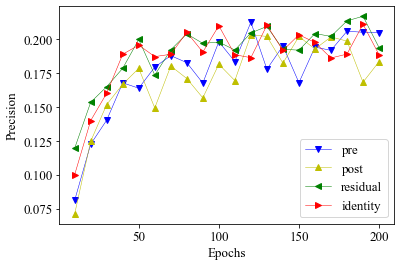

In [55]:
def drawPic(data):
    epoch = []
    for i in range(20):
        epoch.append((i + 1) * 10)
    plt.plot(epoch, data[1], linewidth=0.5, color='b', label='pre', marker="v")
    plt.plot(epoch, data[2], linewidth=0.5, color='y', label='post', marker="^")
    plt.plot(epoch, data[3], linewidth=0.5, color='g', label='residual', marker="<")
    plt.plot(epoch, data[4], linewidth=0.5, color='r', label='identity', marker=">")
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.title('')
    plt.legend()
    
    plt.savefig('map.png', dpi=256)

formatedData = formateData(tableData[3])
drawPic(formatedData)